In [1]:
# Is there a correlation between the number of deaths and rainfall due to wildfires? 
# Are the numbers of deaths caused by wildfires correlated with rainfall?

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import time
from scipy.stats import linregress

In [3]:
# cal_fire_csv = "cal_fire.csv"
# cal_fire_csv.read_csv(r'cal_fire.csd', dtype="object", encoding="utf-8")

fire_csv = pd.read_csv("/Users/grizzlyjenkins/Personal Documents/WashU/yellow/Resources/final_df.csv")
fire_csv

fire_df = pd.DataFrame(fire_csv)
fire_df

,Unnamed: 0,Index,Fire Name,Cause,Acres,Structures,Deaths,County,Month,Year,Rainfall (in)
0,0,0,Mendocino Complex,Under Investigation,459123,280,1,Colusa,July,2018,0.00
1,1,1,Thomas,Powerlines,281893,1063,2,Ventura,December,2017,0.01
2,2,2,Cedar,Human Related,273246,2820,15,San Diego,October,2003,0.01
3,3,3,Rush,Lightning,271911,0,0,Lassen,August,2012,0.05
4,4,4,Rim,Human Related,257314,112,0,Tuolumne,August,2013,0.10
5,5,5,Zaca,Human Related,240207,1,0,Butte,November,2018,6.08
6,6,6,Carr,Human Related,229651,1614,8,Fresno,July,2015,0.56
7,7,7,Matilija,Undetermined,220000,0,0,Tulare,July,2002,0.01
8,8,8,Witch,Powerlines,197990,1650,2,Tuolumne,August,1987,0.03
9,9,9,Klamath Theater Complex,Lightning,192038,0,2,Trinity,August,1999,0.32


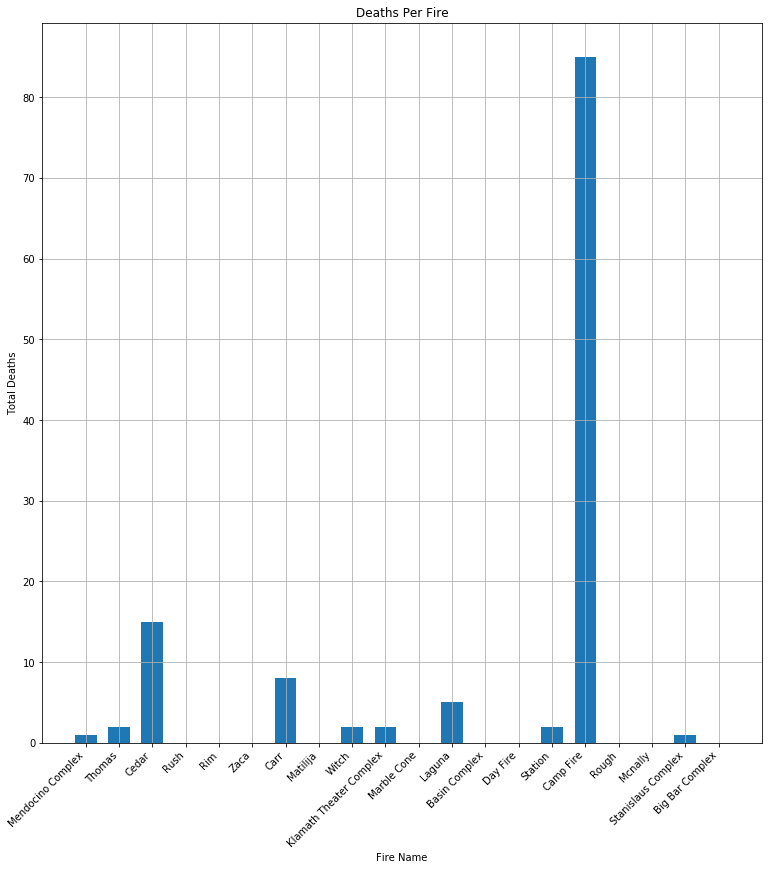

In [4]:
death_data = fire_df["Deaths"]
fire_data = fire_df["Fire Name"]
width = 0.65


fig = plt.figure(figsize=(10,10))
ax = fig.add_axes([0,0,1,1])
ax.bar(fire_data, death_data, width)
ax.grid(zorder=0)
plt.xticks(rotation=45, ha='right')
ax.set_xlabel('Fire Name')
ax.set_ylabel('Total Deaths')
ax.set_title('Deaths Per Fire')
plt.show()

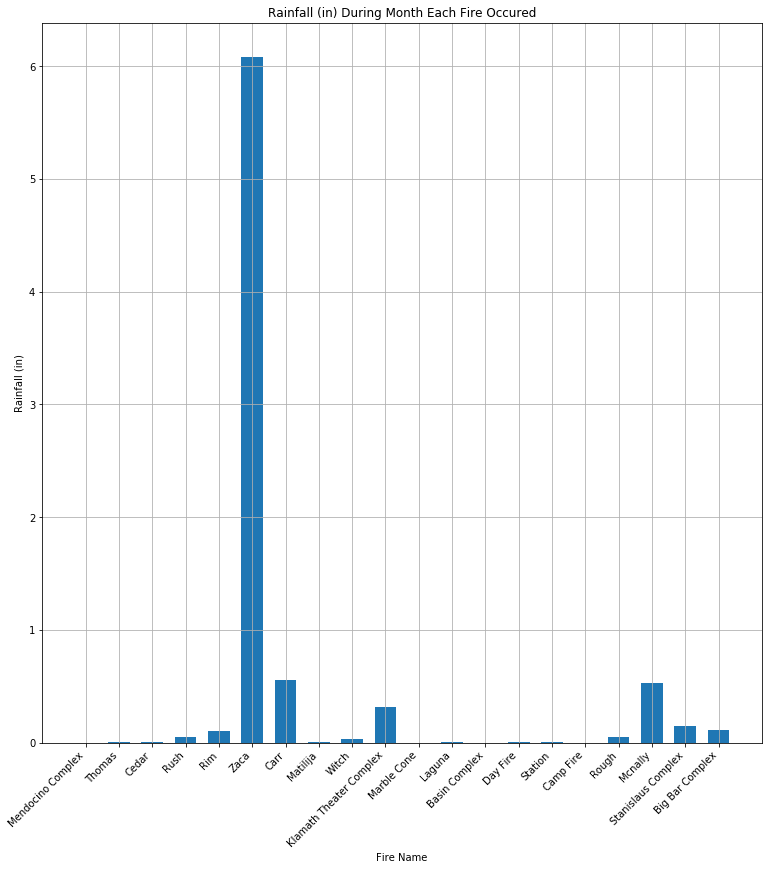

In [8]:
rainfall_data = fire_df["Rainfall (in)"]
fire_data = fire_df["Fire Name"]
width = 0.65


fig = plt.figure(figsize=(10,10))
ax = fig.add_axes([0,0,1,1])
ax.bar(fire_data, rainfall_data, width)
ax.grid(zorder=0)
plt.xticks(rotation=45, ha='right')
ax.set_xlabel('Fire Name')
ax.set_ylabel('Rainfall (in)')
ax.set_title('Rainfall (in) During Month Each Fire Occured')
plt.show()

R squared: 0.00820944012545549


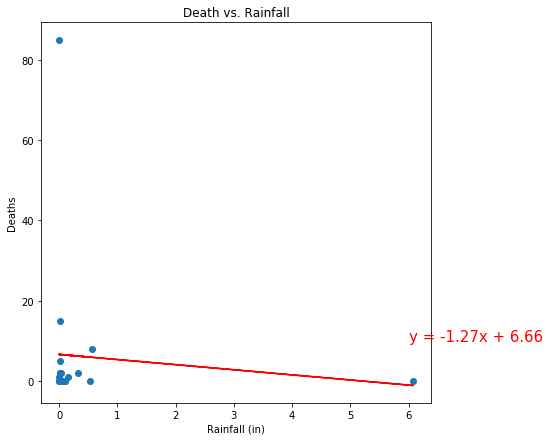

In [5]:
death_mean = round(fire_df['Deaths'].astype('float').mean(), 2)
death_median = round(fire_df['Deaths'].astype('float').median(), 2)
death_mode = round(fire_df['Deaths'].astype('float').mode(), 2)

rain_mean = round(fire_df['Rainfall (in)'].astype('float').mean(), 2)
rain_median = round(fire_df['Rainfall (in)'].astype('float').median(), 2)
rain_mode = round(fire_df['Rainfall (in)'].astype('float').mode(), 2)

x1_values = fire_df['Rainfall (in)'].astype('float')
y1_values = fire_df['Deaths'].astype('float')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x1_values, y1_values)
regress_values = x1_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.figure(figsize=(7,7))
plt.scatter(x1_values,y1_values)

# Plot regression line
plt.plot(x1_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.title('Death vs. Rainfall')
plt.xlabel('Rainfall (in)')
plt.ylabel('Deaths')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()